#### IAU Project Phase 2 - Data Preprocessing
#### Andrej Horváth / Adam Partl
#### Share of work : 50% / 50%

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, PolynomialFeatures, QuantileTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
connections_df = pd.read_csv('data/connections.csv',delimiter='\t', on_bad_lines='skip')
processes_df = pd.read_csv('data/processes.csv',delimiter='\t', on_bad_lines='skip')

In [4]:
connections_df.head(), processes_df.head(), connections_df.columns, processes_df.columns


(                    ts                 imei  mwra  c.android.gm  c.katana  \
 0  2018-05-05 10:00:00   359043379931766452   1.0       9.41966  11.36816   
 1  2018-05-05 10:01:00  3590433799317661388   0.0      13.88490  11.33562   
 2  2018-05-05 10:02:00  3590433799317661925   1.0      12.83463  10.32837   
 3  2018-05-05 10:03:00   863033069630348065   1.0      12.01256  11.44168   
 4  2018-05-05 10:04:00  3590433799317661487   1.0       7.20744   8.65551   
 
    c.android.youtube  c.dogalize  c.android.chrome  c.updateassist  \
 0           15.79285    17.74048           4.72740         0.00468   
 1            9.28987    12.33463          12.07693         0.02109   
 2           10.42188    11.08948           8.86133         0.14300   
 3            8.05241    14.41212          14.89689         0.49394   
 4           12.87184    12.77387           8.96060         0.00351   
 
    c.UCMobile.x86  c.UCMobile.intl  c.raider  c.android.vending  
 0        34.20033         51.88892

In [5]:
merged_df = pd.merge(connections_df, processes_df, on=['ts', 'imei'], how='inner')

In [6]:
merged_df.head()

,ts,imei,mwra_x,c.android.gm,c.katana,c.android.youtube,c.dogalize,c.android.chrome,c.updateassist,c.UCMobile.x86,...,p.browser.provider,p.process.gapps,p.dogalize,p.gms.persistent,p.android.vending,p.android.defcontainer,p.simulator,p.notifier,p.inputmethod.latin,p.katana
0,2018-05-05 10:00:00,359043379931766452,1.0,9.41966,11.36816,15.79285,17.74048,4.72740,0.00468,34.20033,...,58.70704,99.14511,30.15922,46.80586,39.47757,71.04335,18.07725,6.10710,93.51355,43.54900
1,2018-05-05 10:01:00,3590433799317661388,0.0,13.88490,11.33562,9.28987,12.33463,12.07693,0.02109,39.88012,...,70.55709,75.05935,17.47487,54.87990,18.93862,80.71500,42.57503,90.27154,98.06205,13.16659
2,2018-05-05 10:02:00,3590433799317661925,1.0,12.83463,10.32837,10.42188,11.08948,8.86133,0.14300,41.54384,...,35.73376,90.65073,19.59184,68.71474,48.71668,2.84559,97.58948,69.74676,87.89989,87.82491
3,2018-05-05 10:03:00,863033069630348065,1.0,12.01256,11.44168,8.05241,14.41212,14.89689,0.49394,63.92628,...,60.82898,24.18521,73.16847,56.50602,90.77773,13.32702,87.50827,64.63028,49.89641,66.25061
4,2018-05-05 10:04:00,3590433799317661487,1.0,7.20744,8.65551,12.87184,12.77387,8.96060,0.00351,61.11501,...,49.08519,56.95855,47.59887,28.71102,87.78758,75.88927,69.74888,78.87172,22.58957,44.97264


In [7]:
differences = merged_df[merged_df['mwra_x'] != merged_df['mwra_y']]
differences

,ts,imei,mwra_x,c.android.gm,c.katana,c.android.youtube,c.dogalize,c.android.chrome,c.updateassist,c.UCMobile.x86,...,p.browser.provider,p.process.gapps,p.dogalize,p.gms.persistent,p.android.vending,p.android.defcontainer,p.simulator,p.notifier,p.inputmethod.latin,p.katana


In [8]:
merged_df = merged_df.drop(columns=['mwra_y']).rename(columns={'mwra_x': 'mwra'})

In [9]:
X = merged_df.drop(columns=['mwra', 'ts', 'imei'])
y = merged_df['mwra']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12351, 30), (3088, 30), (12351,), (3088,))

### Now that we have successfully prepared the data and split them into training and testing sets, we can proceed to find the best methods for feature selection, scaling and transforming that are going to be used then in the final pipeline.
### Due to us testing multiple combinations to find the best one, the next code block has a runtime of about 5 minutes

In [ ]:
# Define which columns are numerical and which are categorical
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Categorical pipeline: imputation, encoding
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),    # Handle missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))      # Encoding technique
])

# Define pipelines with multiple transformations for numerical features
num_pipeline_alternatives = {
    'standard+power': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('power', PowerTransformer())
    ]),
    'minmax+polynomial': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(degree=2))
    ]),
    'robust+quantile': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('quantile', QuantileTransformer())
    ])
}

# Feature selection options
feature_selection_alternatives = {
    'f_classif': SelectKBest(score_func=f_classif, k=10),
    'mutual_info': SelectKBest(score_func=mutual_info_classif, k=10),
    'from_model_rf': SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=78)),
    'rfe_lr': RFE(estimator=LogisticRegression(max_iter=200), n_features_to_select=10)
}

# Testing different combinations of scaling, transformations, and feature selection
for num_pipeline_name, num_pipeline in num_pipeline_alternatives.items():
    for fs_name, feature_selection in feature_selection_alternatives.items():
        try:
            # Define the full pipeline
            full_pipeline = Pipeline([
                ('preprocessor', ColumnTransformer([
                    ('num', num_pipeline, num_features),
                    ('cat', cat_pipeline, cat_features)
                ])),
                ('feature_selection', feature_selection),
                ('classifier', LogisticRegression(max_iter=200))
            ])

            # Fit and evaluate the pipeline
            full_pipeline.fit(X_train, y_train)
            train_score = full_pipeline.score(X_train, y_train)
            test_score = full_pipeline.score(X_test, y_test)
            print(f"Pipeline with {num_pipeline_name} and {fs_name} selection: Train Score = {train_score}, Test Score = {test_score}")

        except Exception as e:
            print(f"Error with pipeline {num_pipeline_name} and {fs_name} selection: {e}")

Pipeline with standard+power and f_classif selection: Train Score = 0.9130434782608695, Test Score = 0.9206606217616581
Pipeline with standard+power and mutual_info selection: Train Score = 0.9130434782608695, Test Score = 0.9206606217616581
Pipeline with standard+power and from_model_rf selection: Train Score = 0.9076188162901789, Test Score = 0.9128886010362695
Pipeline with standard+power and rfe_lr selection: Train Score = 0.9140150595093515, Test Score = 0.9222797927461139


c:\Users\Andrej\Desktop\IAU-1-Partl-Horvath\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Andrej\Desktop\IAU-1-Partl-Horvath\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Pipeline with minmax+polynomial and f_classif selection: Train Score = 0.9030038053598899, Test Score = 0.9125647668393783
Pipeline with minmax+polynomial and mutual_info selection: Train Score = 0.8801716460205652, Test Score = 0.8879533678756477
Pipeline with minmax+polynomial and from_model_rf selection: Train Score = 0.9170107683588373, Test Score = 0.9245466321243523
Pipeline with minmax+polynomial and rfe_lr selection: Train Score = 0.9145008501335924, Test Score = 0.9238989637305699
Pipeline with robust+quantile and f_classif selection: Train Score = 0.9082665371225002, Test Score = 0.9183937823834197
Pipeline with robust+quantile and mutual_info selection: Train Score = 0.9083475022265404, Test Score = 0.9180699481865285
Pipeline with robust+quantile and from_model_rf selection: Train Score = 0.9047040725447332, Test Score = 0.9102979274611399
Pipeline with robust+quantile and rfe_lr selection: Train Score = 0.9081855720184601, Test Score = 0.9177461139896373


Based on the results of this testing, we can see that the best performing combination for the pipeline is to use **Simple Imputer** with **Min Max Scaler** and **Polynomial Transformer** . Futhermore the feature selection method that seems to be the best for the setting of this pipeline is **Random Forest**
Next we will proceed with some fine-tuning to try to get even better accuracy and base the final pipeline on that.

### Final Pipeline

In [ ]:
# Define which columns are numerical and which are categorical
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2)),
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore')),    
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Create a full pipeline with the preprocessor and feature selection
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=78))),  # Feature selection
    ('classifier', LogisticRegression(max_iter=200))
])

# Fit the pipeline to the training data
full_pipeline.fit(X_train, y_train)

# Evaluate the model
train_score = full_pipeline.score(X_train, y_train)
test_predictions = full_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Save the pipeline
pipeline_filename = 'pipeline.pkl'
joblib.dump(full_pipeline, pipeline_filename)

train_score, test_accuracy, pipeline_filename

(0.9170107683588373, 0.9245466321243523, 'pipeline.pkl')

In [15]:
from sklearn.model_selection import cross_val_score

# Run cross-validation on the training data
cv_scores = cross_val_score(full_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Mean Accuracy:", cv_scores.mean())

Cross-Validation Mean Accuracy: 0.9162011806592096


In [16]:
from sklearn.metrics import classification_report

train_predictions = full_pipeline.predict(X_train)
print("Training Classification Report:\n", classification_report(y_train, train_predictions))

Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.85      0.88      4607
         1.0       0.91      0.96      0.94      7744

    accuracy                           0.92     12351
   macro avg       0.92      0.90      0.91     12351
weighted avg       0.92      0.92      0.92     12351



In [17]:
test_predictions = full_pipeline.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, test_predictions))

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      1139
         1.0       0.92      0.96      0.94      1949

    accuracy                           0.92      3088
   macro avg       0.93      0.91      0.92      3088
weighted avg       0.92      0.92      0.92      3088



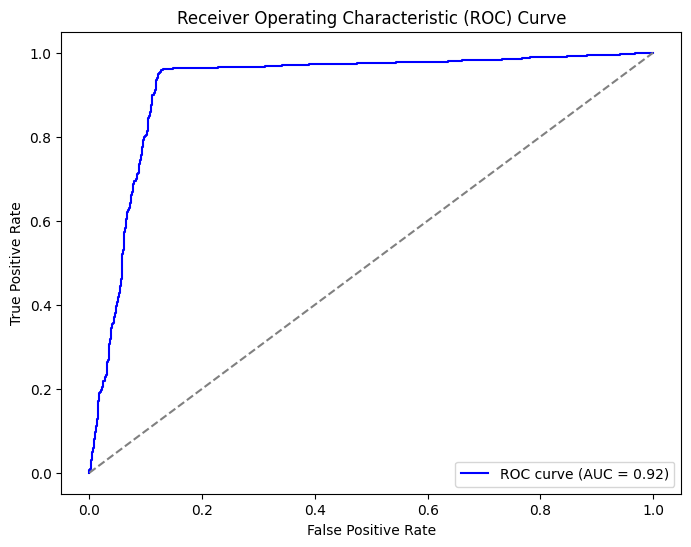

In [18]:
y_test_proba = full_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [19]:
feature_selector = full_pipeline.named_steps['feature_selection']
selected_model = feature_selector.estimator_  # This is the RandomForestClassifier

# Extract feature importances from the RandomForest model
importances = selected_model.feature_importances_

# Get feature names after preprocessing (i.e., after encoding and transformation)
preprocessed_features = full_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a sorted list of features with their importances
feature_importances = sorted(zip(preprocessed_features, importances), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 most important features:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

Top 10 most important features:
num__c.android.gm p.android.packageinstaller: 0.040676757146770146
num__c.android.gm: 0.030066440448937016
num__c.android.youtube^2: 0.029309064082225555
num__c.android.gm^2: 0.02868077773529099
num__c.android.gm c.android.chrome: 0.02632892457470994
num__c.android.chrome c.updateassist: 0.02566556222501764
num__p.android.packageinstaller p.android.externalstorage: 0.022365110616830348
num__c.updateassist p.android.gm: 0.022146973548949636
num__c.android.gm c.updateassist: 0.01876914478494386
num__c.updateassist p.olauncher: 0.01730690951565586
